In [680]:
# base ball case study
# import imp libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [681]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [682]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [683]:
data.shape

(30, 17)

In [684]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [541]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [572]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [542]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [685]:
# check unique value in 'w'
data['W'].nunique()

24

In [686]:
# checking value counts in all columns
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

In [687]:
data_unique=pd.DataFrame({'unique_values':data.nunique()})

In [688]:
data_unique

,unique_values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


In [ ]:
# unique values are high for   features ,target are contineous data  so that we can see that this is a regression problem

In [577]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [689]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [642]:
data['CG'].nunique()

9

In [580]:
data['CG'].unique()

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

In [690]:
data['CG'].value_counts()

1     7
2     4
7     4
3     3
0     3
5     3
6     3
4     2
11    1
Name: CG, dtype: int64

In [691]:
data['CG']=data['CG'].replace(0,data['CG'].mean())

In [692]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.813333,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.503845,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,1.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,2.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.466667,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [693]:
data.drop_duplicates(inplace=True)

In [694]:
data.duplicated().sum()

0

In [ ]:
# summary of the statistics there is no null values ,negative values
# all column counts are same no missing value 
# min  value in CG column contains zero ,replace with mean()
# if duplicates value present removed using drop_duplicated()
# datatype of each column is apropriate for data present in the column

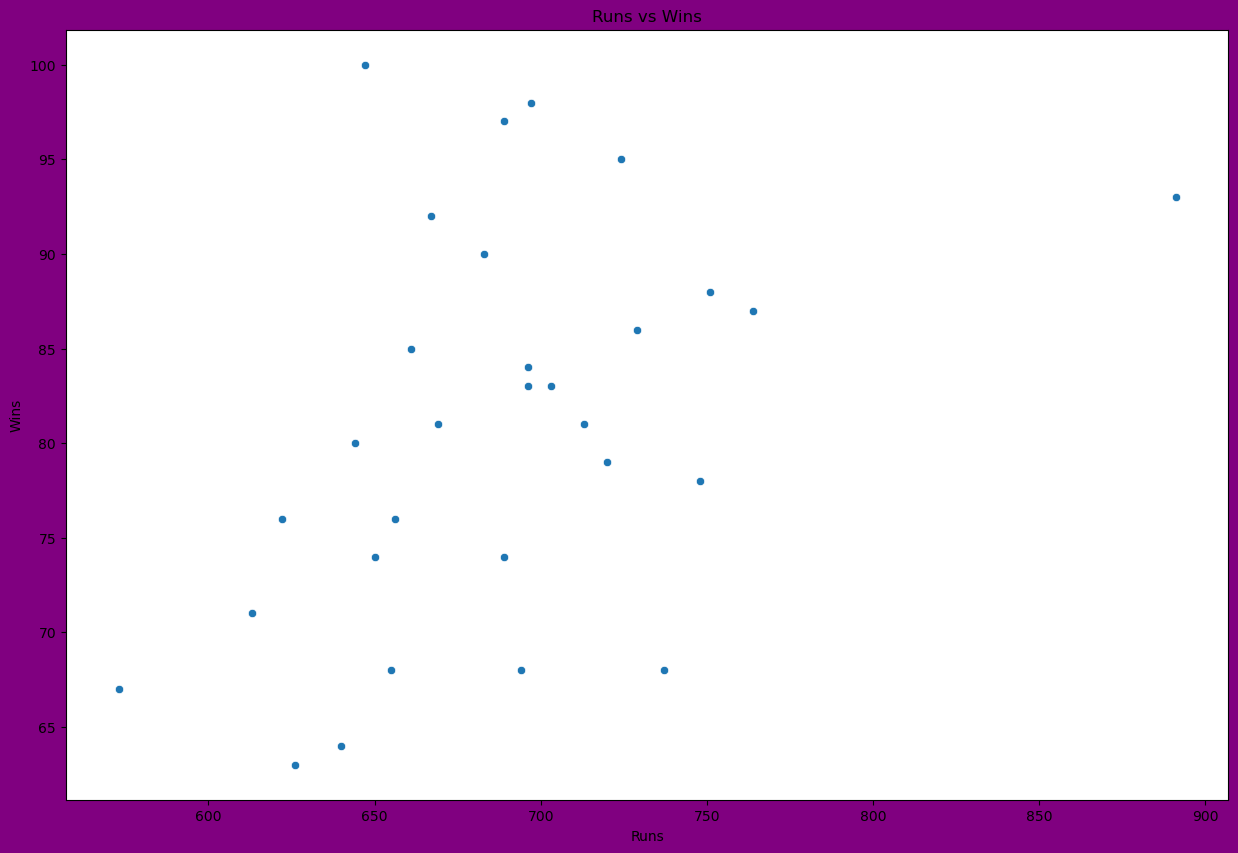

In [252]:
# visualising relation between features and target 
# first check relation between win and runs 
plt.figure(figsize=(15,10),facecolor='purple')
sns.scatterplot(x=data['R'],y=data['W'])
plt.xlabel('Runs')
plt.ylabel('Wins')
plt.title('Runs vs Wins')
plt.show()

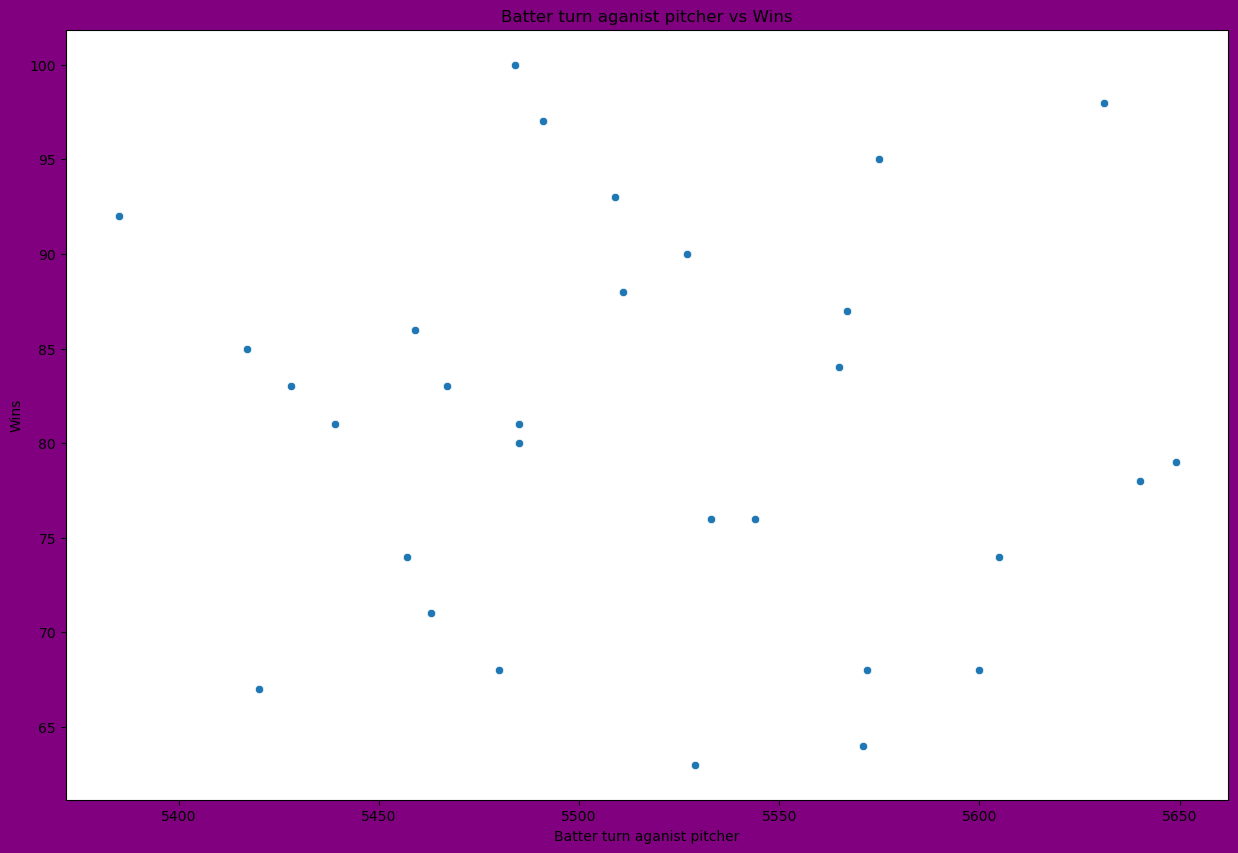

In [28]:
# slight corelation is there between runs and wins
# 2 check relatioship between Win and AB 
plt.figure(figsize=(15,10),facecolor='purple')
sns.scatterplot(x=data['AB'],y=data['W'])
plt.xlabel('Batter turn aganist pitcher')
plt.ylabel('Wins')
plt.title('Batter turn aganist pitcher vs Wins')
plt.show()

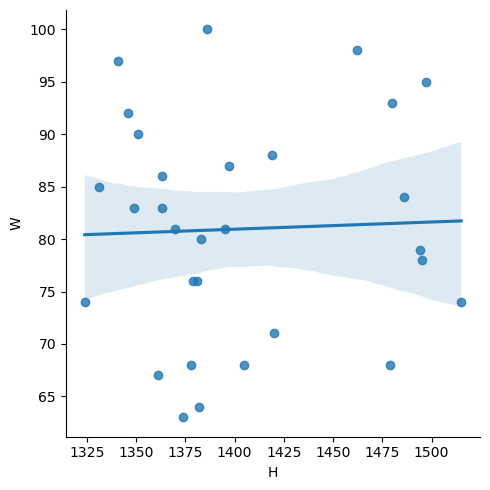

In [29]:
# slight corelation is there between batter turn aganist pitcher  and wins
# 3 check relatioship between Win and H
sns.lmplot(x='H',y='W',data=data,palette='colorblind')

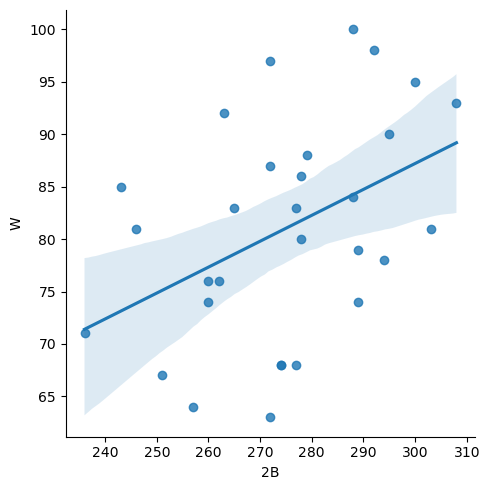

In [30]:
# weak corelation is there between H  and wins
# 4 check relatioship between Win and 2B
sns.lmplot(x='2B',y='W',data=data,palette='colorblind')

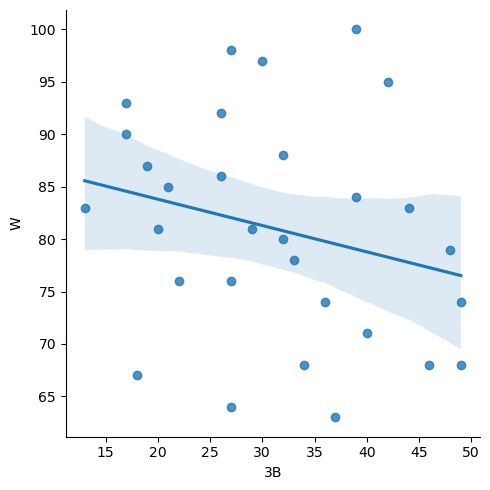

In [31]:
#  corelation is there between 2B  and wins
#  check relatioship between win and 3B
sns.lmplot(x='3B',y='W',data=data,palette='colorblind')

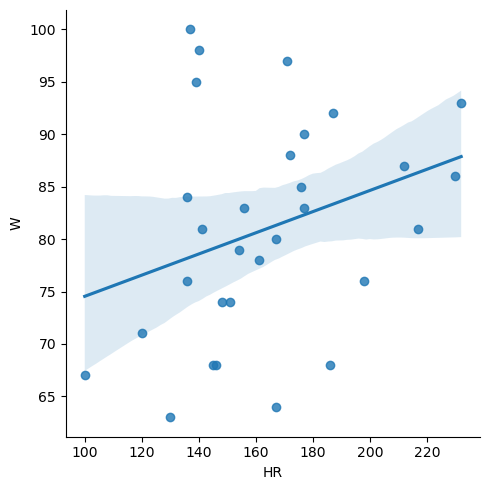

In [32]:
#  negative corelation is there between 3B  and wins
#  check relatioship between win and HR
sns.lmplot(x='HR',y='W',data=data,palette='colorblind')

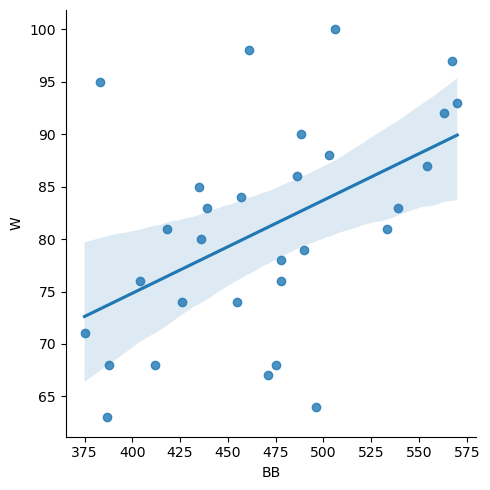

In [33]:
#  positive  corelation is there between HR  and wins
#  check relatioship between win and BB
sns.lmplot(x='BB',y='W',data=data,palette='colorblind')

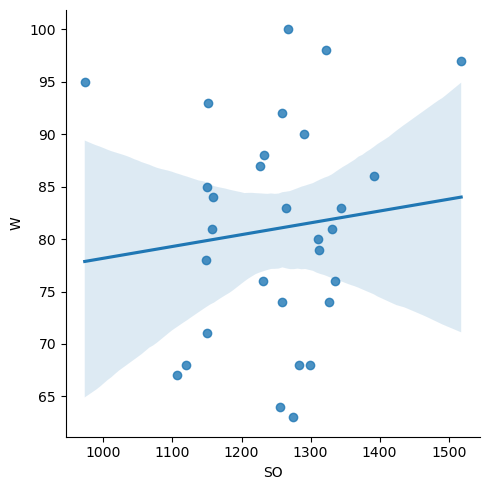

In [34]:
#  positive  corelation is there between BB  and wins
#  check relatioship between win and SO
sns.lmplot(x='SO',y='W',data=data,palette='colorblind')

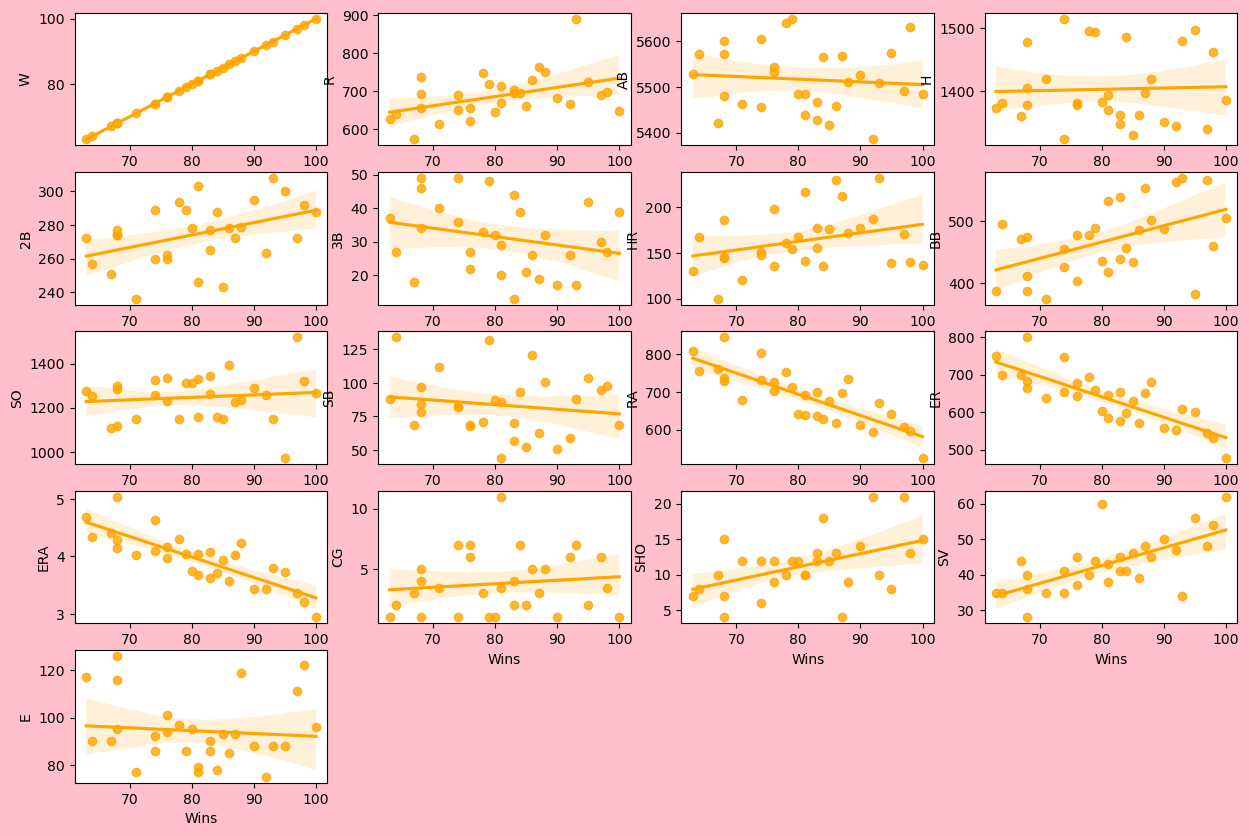

In [37]:
#  slight positive  corelation is there between SO  and wins
plt.figure(figsize=(15,10),facecolor='pink')
p=1
for i in data:
    if p<20:
        plt.subplot(5,4,p)
        sns.regplot(x='W',y=data[i],data=data,color='orange')
        plt.xlabel('Wins')
        plt.ylabel(i)
    p+=1
plt.show()

In [ ]:
# we can see that there is positive corelation between R,2B,CG,SHO,SV,HR,BB and AB,3B,SB,RA,ER,EPA have negative corelation 

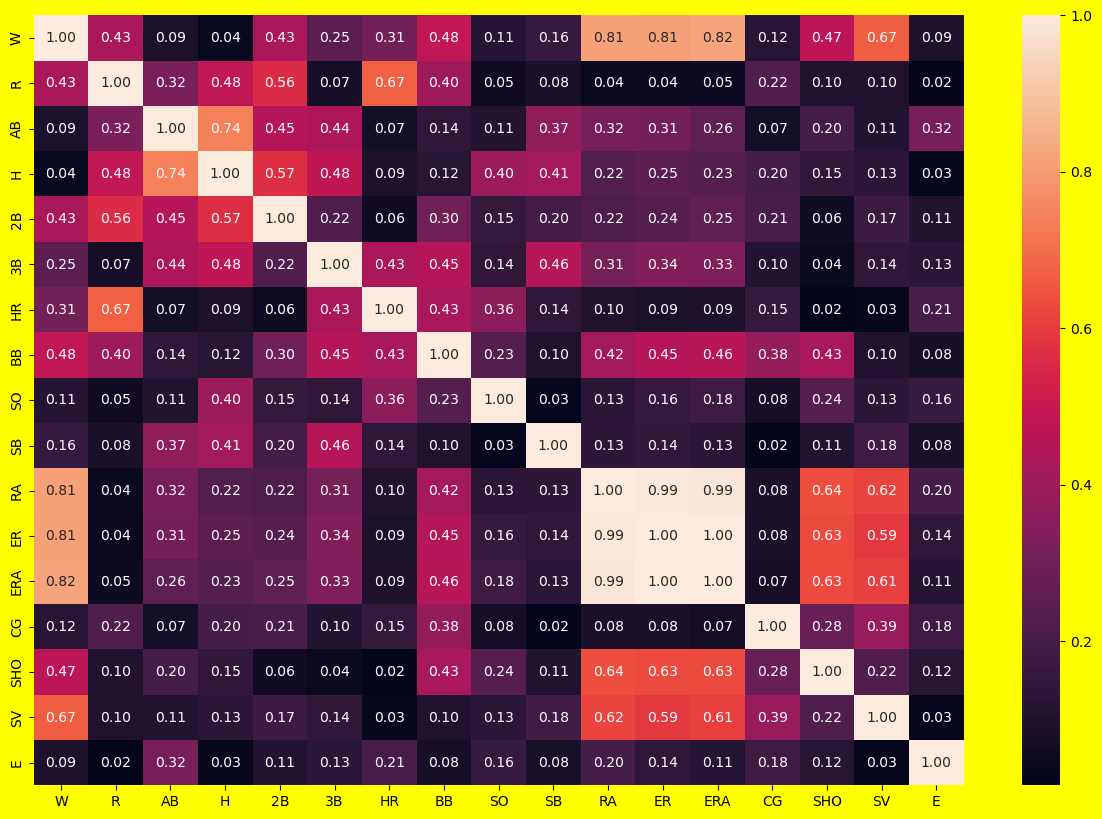

In [59]:
# visualise dataset to check feature and target relationship  ,check corelation between features also 
data_corr=data.corr().abs()
plt.figure(figsize=(15,10),facecolor='yellow')
sns.heatmap(data_corr,annot=True,fmt='0.2f',linecolor='black')
plt.show()

In [ ]:
# we can see that features like RA,ER,ERA and SV have strong relation with target variable .
# features RA and ERA have strong relation with each other 
# features RA and ER strong corelation ,features ERA and ER strongly corelated 

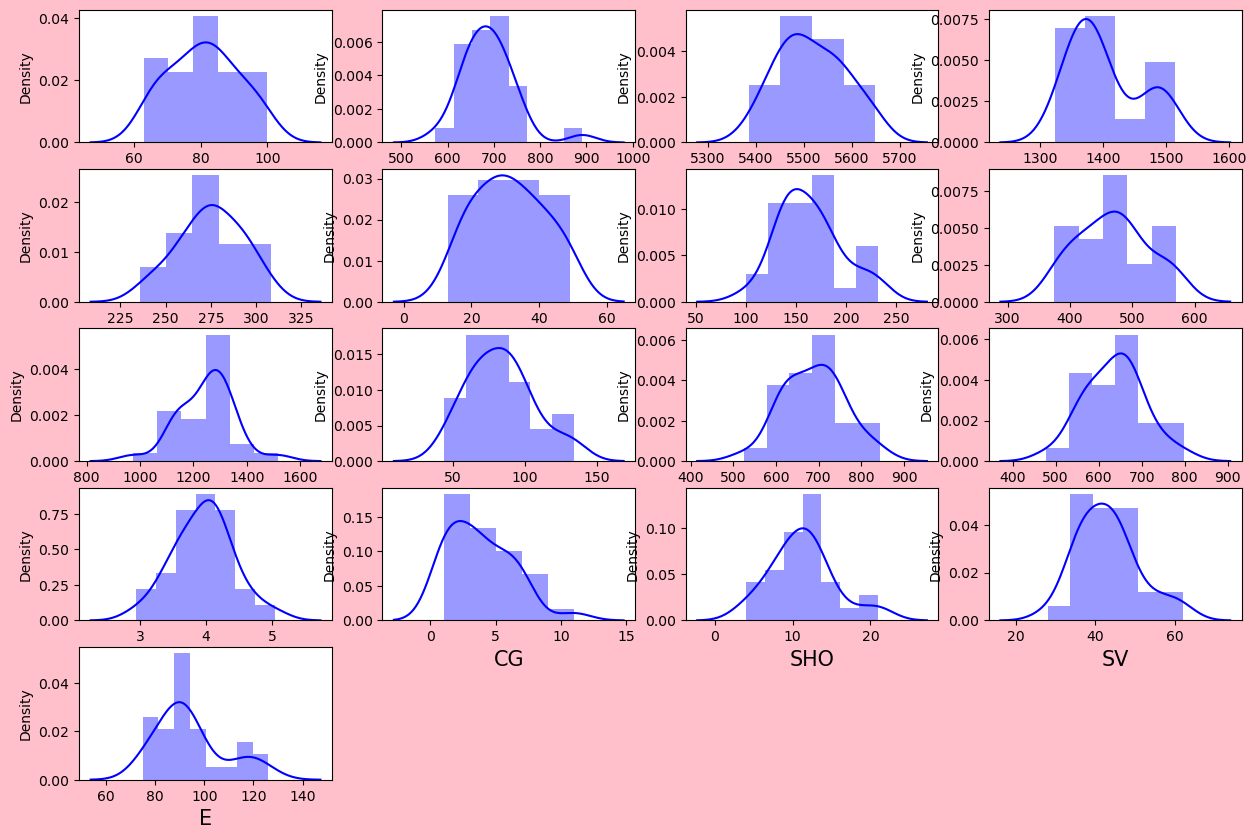

In [61]:
# check normal distribution 
plt.figure(figsize=(15,10),facecolor='pink')
p=1
for column in data:
    if p<20:
        plt.subplot(5,4,p)
        sns.distplot(data[column],color='b')
        plt.xlabel(column,fontsize=15)
    p+=1
plt.show()

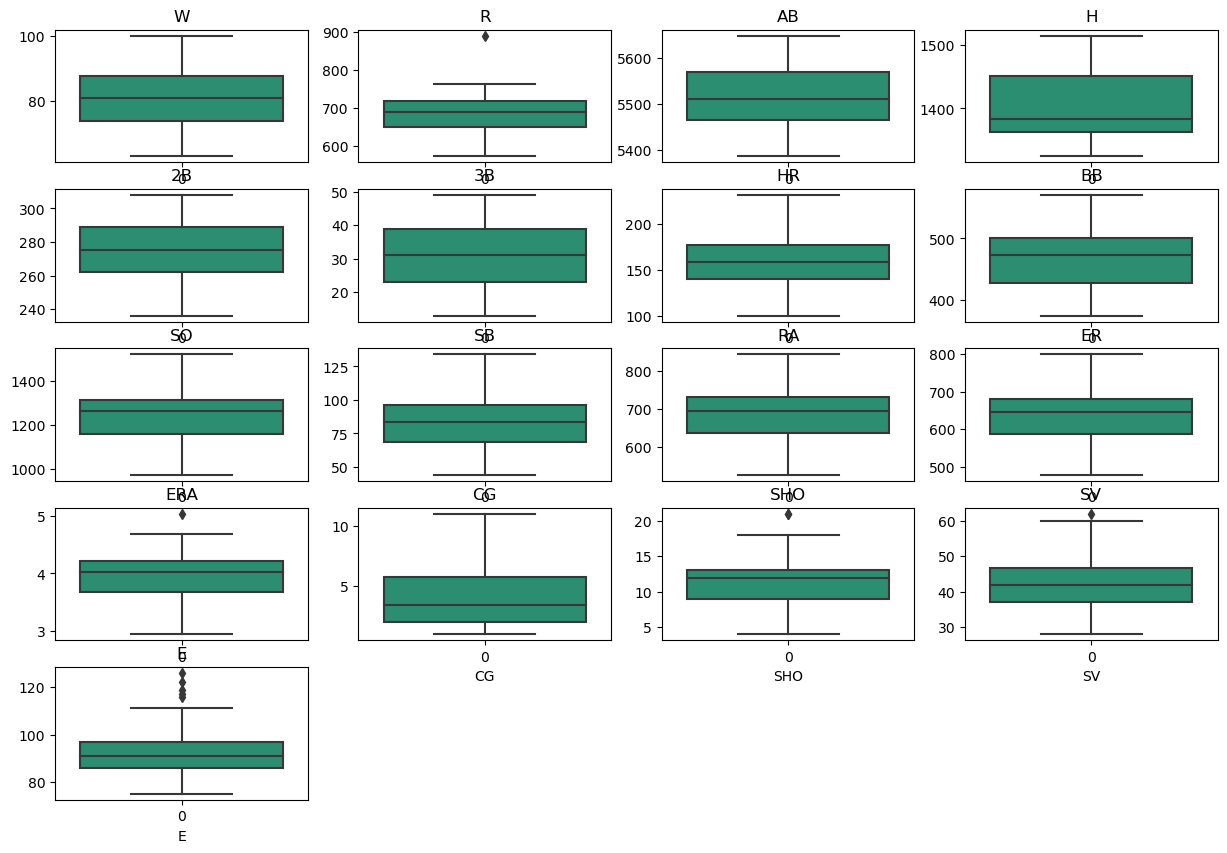

,R,ERA,SHO,SV,E
0,0.619078,0.506955,0.814629,1.671607,0.461470
1,0.134432,0.254598,0.172800,0.249879,0.607197
2,0.332906,0.641347,0.320914,0.654856,1.117242
3,1.146419,0.053010,0.567771,0.784104,0.485758
4,0.013270,1.531318,0.172800,1.042600,0.607197
5,3.509647,0.350165,0.320914,1.171848,0.461470
6,1.311430,0.165003,1.802057,0.637623,0.097152
7,0.428681,0.209800,0.320914,0.008617,1.262970
8,0.765626,0.484557,0.172800,2.188598,0.048576
9,1.034489,0.792164,0.320914,0.396360,0.194303


(array([5], dtype=int64), array([0], dtype=int64))

(29, 17)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2.0,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2.0,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11.0,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7.0,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7.0,12,35,86


W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.962517
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.010734
SHO    0.526943
SV     0.627480
E      0.586101
dtype: float64

W      0.119013
R     -0.388428
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.962517
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

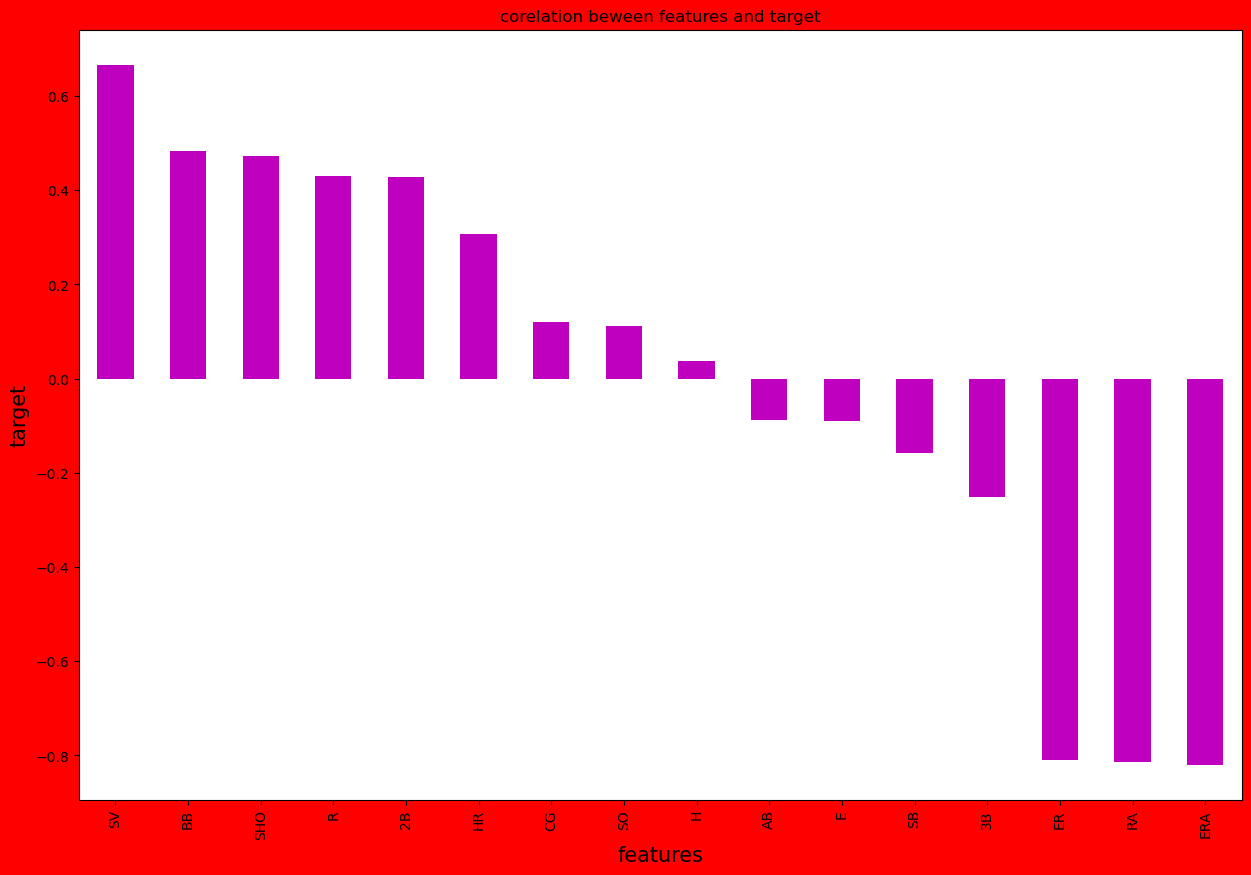

In [587]:
# visualising relation between  features and target 
plt.figure(figsize=(15,10),facecolor='r')
data.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='m')
plt.xlabel('features',fontsize=15)
plt.ylabel('target',fontsize=15)
plt.title('corelation beween features and target')
plt.show()

In [695]:
# features like CG,SO,H,AB,E CONTRIBUTING LESS TO THE TARGET VARIABLE 
# divide dataset into features and target
x=data.drop('W',axis=1)
y=data['W']

In [696]:
y.shape

(30,)

In [697]:
x.shape

(30, 16)

In [698]:
from sklearn.feature_selection import SelectPercentile,chi2

In [700]:
SPercentile=SelectPercentile(score_func=chi2,percentile=80)
SPercentile=SPercentile.fit(x,y)

In [701]:
# seperate features to check p value
cols=SPercentile.get_support(indices=True)
print('Feature indices =',cols)
features=x.columns[cols]
print('features =',list(features))

Feature indices = [ 0  2  4  5  6  7  8  9 10 13 14 15]
features = ['R', 'H', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'SHO', 'SV', 'E']


In [702]:
data_scores=pd.DataFrame({'features':x.columns,'chi2Score':SPercentile.scores_,'pValue':SPercentile.pvalues_})
data_scores.sort_values(by='chi2Score',ascending=False)

,features,chi2Score,pValue
7,SO,213.268413,8.938748e-33
9,RA,197.781566,9.420381e-30
10,ER,192.499607,9.976463e-29
8,SB,166.938124,8.089020e-24
6,BB,161.137711,1.019445e-22
5,HR,142.024649,3.903996e-19
0,R,137.220468,3.022392e-18
4,3B,77.453674,8.163669e-08
15,E,54.037102,2.646094e-04
2,H,50.277253,8.471974e-04


In [703]:
x=data[features]

In [704]:
x.shape

(30, 12)

In [705]:
y=data['W']

In [706]:
y.shape

(30,)

(29, 16)

(30,)

In [707]:
# SCALING DATA using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x


,R,H,3B,HR,BB,SO,SB,RA,ER,SHO,SV,E
0,0.619078,1.663685,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.814629,1.671607,-0.461470
1,0.134432,-0.970681,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.172800,0.249879,-0.607197
2,-0.332906,-0.151891,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.320914,-0.654856,-1.117242
3,-1.146419,-0.401088,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,-0.567771,-0.784104,0.485758
4,0.013270,1.984081,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,0.172800,-1.042600,-0.607197
5,3.509647,1.361089,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.320914,-1.171848,-0.461470
6,1.311430,-0.116292,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,-1.802057,0.637623,-0.097152
7,0.428681,-0.596886,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,-0.320914,-0.008617,-1.262970
8,-0.765626,-0.365489,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,0.172800,2.188598,0.048576
9,1.034489,1.628086,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,-0.320914,-0.396360,0.194303


,vif_values,features
0,6.881468,R
1,17.740238,AB
2,12.834618,H
3,2.767283,2B
4,3.344446,3B
5,8.397153,HR
6,3.013650,BB
7,2.704458,SO
8,2.093845,SB
9,191.867288,RA


,vif_values,features
0,6.154909,R
1,5.044168,AB
2,10.425147,H
3,2.713166,2B
4,3.282947,3B
5,6.349744,HR
6,2.684261,BB
7,2.074655,SO
8,1.855184,SB
9,5.194661,ERA


In [352]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.511388,-0.607720,-0.813262,1.643157,-0.435733
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.238952,-0.607720,0.159299,0.211006,-0.598110
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.643801,2.050620,-0.326982,-0.700362,-1.197382
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.040333,1.273106,-0.570122,-0.830557,0.538291
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.496876,1.273106,0.159299,-1.090948,-0.598110


(29, 14)

(29,)

,vif_values,features
0,8.857450,R
1,4.072641,AB
2,7.799903,H
3,2.954018,2B
4,2.553159,3B
5,6.921964,HR
6,2.880729,BB
7,2.075096,SO
8,1.589606,SB
9,2.303789,CG


In [708]:
# model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


In [709]:
maxACC=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    gbr=GradientBoostingRegressor()
    gbr.fit(x_train,y_train)
    pred=gbr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxRS=i
print('maximum accuracy ',maxACC,'on Random state ',maxRS)

maximum accuracy  0.846224993074149 on Random state  149


In [710]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxRS)


In [711]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import AdaBoostRegressor


In [712]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBR_pred=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('Accuracy score ',r2_score(y_test,GBR_pred)*100)
print('Accuracy score for training',r2_score(y_train,pred_train)*100)
print('Mean absolute error ',mean_absolute_error(y_test,GBR_pred))
print('Mean squared error ',mean_squared_error(y_test,GBR_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,GBR_pred)))


Accuracy score  86.26356050280327
Accuracy score for training 99.99992488832945
Mean absolute error  3.8123796754367283
Mean squared error  17.811583214698423
Root Mean squared error  4.22037714128707


In [713]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_pred_train=lr.predict(x_train)
print('Accuracy score ',r2_score(y_test,lr_pred))
print('Accuracy score for training',r2_score(y_train,lr_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,lr_pred))
print('Mean squared error ',mean_squared_error(y_test,lr_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,lr_pred)))

Accuracy score  0.8560921519097733
Accuracy score for training 0.9177200853134793
Mean absolute error  3.429706511707168
Mean squared error  18.660050969032735
Root Mean squared error  4.319728112859967


In [714]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(x_train,y_train)
dt_pred=lr.predict(x_test)
dt_pred_train=dt.predict(x_train)
print('Accuracy score ',r2_score(y_test,dt_pred))
print('Accuracy score for training',r2_score(y_train,dt_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,dt_pred))
print('Mean squared error ',mean_squared_error(y_test,dt_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,dt_pred)))

Accuracy score  0.8560921519097733
Accuracy score for training 1.0
Mean absolute error  3.429706511707168
Mean squared error  18.660050969032735
Root Mean squared error  4.319728112859967


In [715]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()

knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_pred_train=knn.predict(x_train)
print('Accuracy score ',r2_score(y_test,knn_pred))
print('Accuracy score for training',r2_score(y_train,knn_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,knn_pred))
print('Mean squared error ',mean_squared_error(y_test,knn_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,knn_pred)))

Accuracy score  0.6795372750642672
Accuracy score for training 0.5224809921145941
Mean absolute error  5.500000000000003
Mean squared error  41.55333333333336
Root Mean squared error  6.446187503736868


In [716]:
from sklearn.linear_model import Ridge,Lasso
ridge=Ridge()

ridge.fit(x_train,y_train)
ridge_pred=ridge.predict(x_test)
ridge_pred_train=ridge.predict(x_train)
print('Accuracy score ',r2_score(y_test,ridge_pred))
print('Accuracy score for training',r2_score(y_train,ridge_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,ridge_pred))
print('Mean squared error ',mean_squared_error(y_test,ridge_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,ridge_pred)))

Accuracy score  0.8745031846571603
Accuracy score for training 0.9136008573543231
Mean absolute error  3.258437325186707
Mean squared error  16.272753722788217
Root Mean squared error  4.033950138857472


In [717]:
lasso=Lasso()

lasso.fit(x_train,y_train)
lasso_pred=lasso.predict(x_test)
lasso_pred_train=lasso.predict(x_train)
print('Accuracy score ',r2_score(y_test,lasso_pred))
print('Accuracy score for training',r2_score(y_train,lasso_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,lasso_pred))
print('Mean squared error ',mean_squared_error(y_test,lasso_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,lasso_pred)))

Accuracy score  0.879225644330556
Accuracy score for training 0.8740973065956947
Mean absolute error  3.5797885187994773
Mean squared error  15.66040811847123
Root Mean squared error  3.957323352781679


In [718]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

ada.fit(x_train,y_train)
ada_pred=ada.predict(x_test)
ada_pred_train=ada.predict(x_train)
print('Accuracy score ',r2_score(y_test,ada_pred))
print('Accuracy score for training',r2_score(y_train,ada_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,ada_pred))
print('Mean squared error ',mean_squared_error(y_test,ada_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,ada_pred)))

Accuracy score  0.8280727663816169
Accuracy score for training 0.9902698179488777
Mean absolute error  4.188095238095239
Mean squared error  22.293231292517017
Root Mean squared error  4.721570850100315


In [719]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
svm_pred_train=svm.predict(x_train)
print('Accuracy score ',r2_score(y_test,svm_pred))
print('Accuracy score for training',r2_score(y_train,svm_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,svm_pred))
print('Mean squared error ',mean_squared_error(y_test,svm_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,svm_pred)))

Accuracy score  0.14857885037511465
Accuracy score for training 0.24517384172500278
Mean absolute error  8.278056923869777
Mean squared error  110.40094240136013
Root Mean squared error  10.50718527491355


In [720]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr_pred=etr.predict(x_test)
etr_pred_train=etr.predict(x_train)
print('Accuracy score ',r2_score(y_test,etr_pred))
print('Accuracy score for training',r2_score(y_train,etr_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,etr_pred))
print('Mean squared error ',mean_squared_error(y_test,etr_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,etr_pred)))

Accuracy score  0.8070384318766067
Accuracy score for training 1.0
Mean absolute error  4.305
Mean squared error  25.020683333333327
Root Mean squared error  5.00206790570993


In [721]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
rfr_pred_train=rfr.predict(x_train)
print('Accuracy score ',r2_score(y_test,rfr_pred))
print('Accuracy score for training',r2_score(y_train,rfr_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,rfr_pred))
print('Mean squared error ',mean_squared_error(y_test,rfr_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,rfr_pred)))

Accuracy score  0.8079384318766066
Accuracy score for training 0.9135348845414293
Mean absolute error  4.288333333333334
Mean squared error  24.903983333333343
Root Mean squared error  4.990389096386507


In [722]:
from sklearn.model_selection import cross_val_score

In [723]:
val_score=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print('Accuracy score ',r2_score(y_test,GBR_pred))
print('cross val score ', val_score)
print('aversge score ',val_score.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,GBR_pred)-val_score.mean()))

Accuracy score  0.8626356050280327
cross val score  [-0.31568226 -7.40682764  0.33296791  0.28899903  0.46067848]
aversge score  -1.3279728976313132
deference between R2 score and cross val score  2.190608502659346


In [724]:
val_score1=cross_val_score(lr,x,y)
print('Accuracy score ',r2_score(y_test,lr_pred))
print('cross val score ', val_score1)
print('aversge score ',val_score1.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,lr_pred)-val_score1.mean()))

Accuracy score  0.8560921519097733
cross val score  [ 0.47197474 -1.59785048  0.40969292  0.77833467  0.91251784]
aversge score  0.19493394026297292
deference between R2 score and cross val score  0.6611582116468003


In [673]:
val_score2=cross_val_score(dt,x,y)
print('Accuracy score ',r2_score(y_test,dt_pred))
print('cross val score ', val_score2)
print('aversge score ',val_score2.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,dt_pred)-val_score2.mean()))

Accuracy score  0.918584762613191
cross val score  [-1.22202487 -9.99236641 -0.37319117  0.45934066  0.46390533]
aversge score  -2.132867291896949
deference between R2 score and cross val score  3.05145205451014


In [725]:
val_score3=cross_val_score(knn,x,y)
print('Accuracy score ',r2_score(y_test,knn_pred))
print('cross val score ', val_score3)
print('aversge score ',val_score3.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,knn_pred)-val_score3.mean()))

Accuracy score  0.6795372750642672
cross val score  [-0.11420959 -3.67679389  0.23051028  0.01279749  0.71008284]
aversge score  -0.5675225748687718
deference between R2 score and cross val score  1.247059849933039


In [726]:
val_score4=cross_val_score(ridge,x,y)
print('Accuracy score ',r2_score(y_test,ridge_pred))
print('cross val score ', val_score4)
print('aversge score ',val_score4.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,ridge_pred)-val_score4.mean()))

Accuracy score  0.8745031846571603
cross val score  [ 0.68000108 -1.10655357  0.55619285  0.78813819  0.92261709]
aversge score  0.36807912751367156
deference between R2 score and cross val score  0.5064240571434887


In [727]:
val_score5=cross_val_score(lasso,x,y)
print('Accuracy score ',r2_score(y_test,lasso_pred))
print('cross val score ', val_score5)
print('aversge score ',val_score5.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,lasso_pred)-val_score5.mean()))

Accuracy score  0.879225644330556
cross val score  [ 0.78368121 -0.49227424  0.65979117  0.66179609  0.91734209]
aversge score  0.5060672667545356
deference between R2 score and cross val score  0.37315837757602044


In [728]:
val_score6=cross_val_score(ada,x,y)
print('Accuracy score ',r2_score(y_test,ada_pred))
print('cross val score ', val_score6)
print('aversge score ',val_score6.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,ada_pred)-val_score6.mean()))

Accuracy score  0.8280727663816169
cross val score  [ 0.18365231 -6.11691932  0.27967318  0.1255652   0.76044662]
aversge score  -0.9535164016455312
deference between R2 score and cross val score  1.781589168027148


In [729]:
val_score7=cross_val_score(svm,x,y)
print('Accuracy score ',r2_score(y_test,svm_pred))
print('cross val score ', val_score7)
print('aversge score ',val_score7.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,svm_pred)-val_score7.mean()))

Accuracy score  0.14857885037511465
cross val score  [-0.13213022 -0.72394495 -0.26917877 -0.56751417 -0.01656861]
aversge score  -0.34186734436579863
deference between R2 score and cross val score  0.4904461947409133


In [730]:
val_score8=cross_val_score(etr,x,y)
print('Accuracy score ',r2_score(y_test,etr_pred))
print('cross val score ', val_score8)
print('aversge score ',val_score8.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,etr_pred)-val_score8.mean()))

Accuracy score  0.8070384318766067
cross val score  [-0.04041252 -4.2496313   0.38194985  0.31260308  0.76688101]
aversge score  -0.5657219778790192
deference between R2 score and cross val score  1.3727604097556259


In [731]:
val_score9=cross_val_score(rfr,x,y)
print('Accuracy score ',r2_score(y_test,rfr_pred))
print('cross val score ', val_score9)
print('aversge score ',val_score9.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,rfr_pred)-val_score9.mean()))

Accuracy score  0.8079384318766066
cross val score  [ 0.0657984  -4.54709504  0.16596036  0.33047611  0.72910763]
aversge score  -0.651150507780323
deference between R2 score and cross val score  1.4590889396569295


In [ ]:
# building lots of model we can see that lasso regression model permorm better compared to other models .the deference in r2 score and cross validation score is high because the dataset is small

# fro small dataset its very crusial to select best features here i used selectpercentile for selecting best 80% features for model building